In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [5]:
df = pd.read_csv('/content/data.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Drop the 'id' column as it's not needed for analysis
df.drop(columns=['id'], inplace=True)


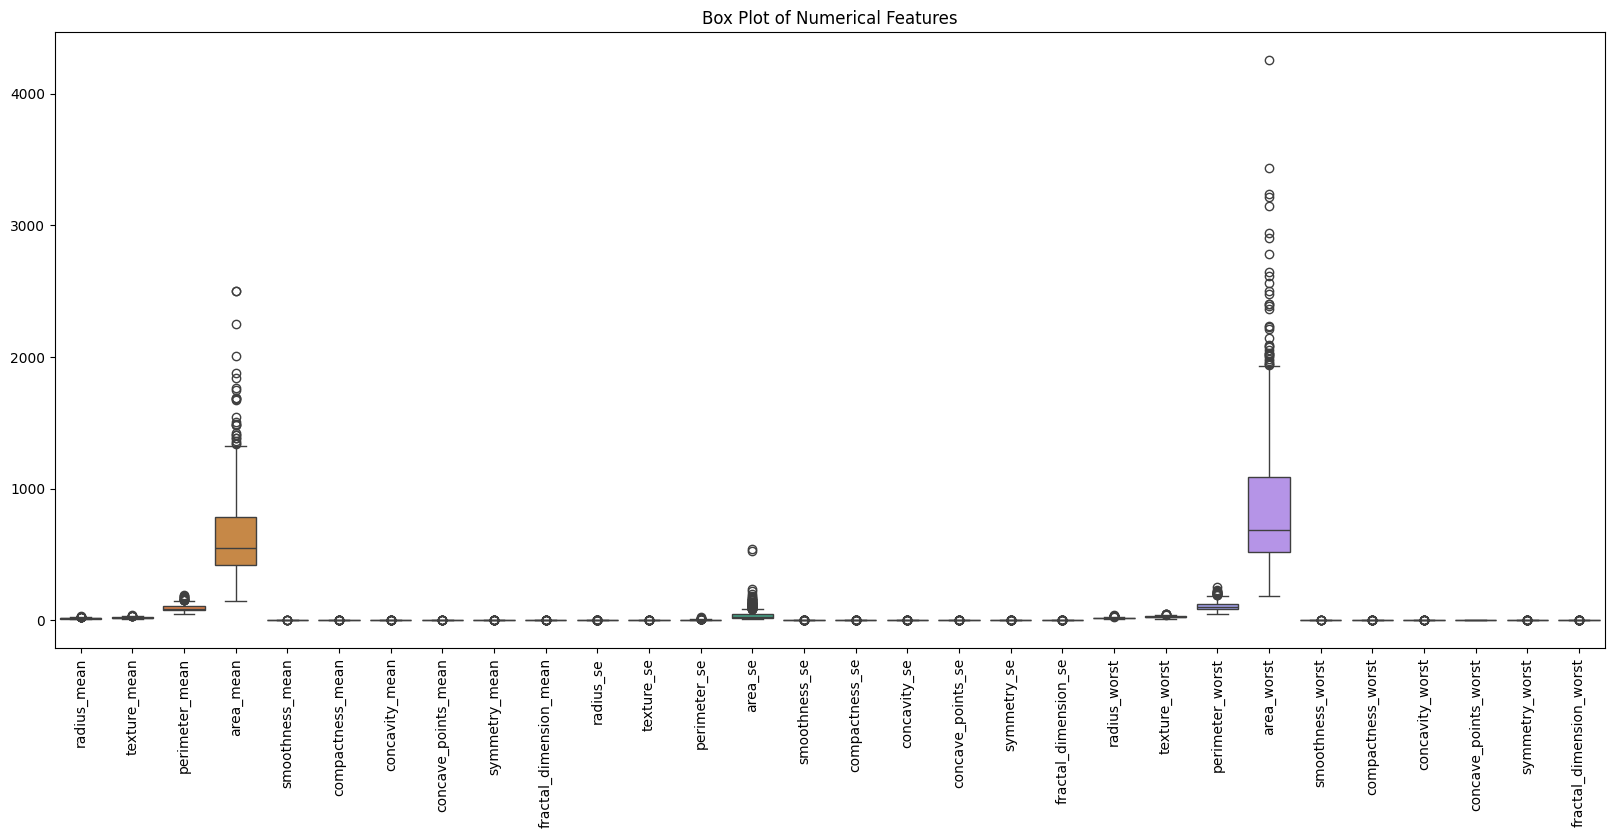

In [8]:
# Box Plot
plt.figure(figsize=(20, 8))
sns.boxplot(data=df.drop(columns=['diagnosis']))
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

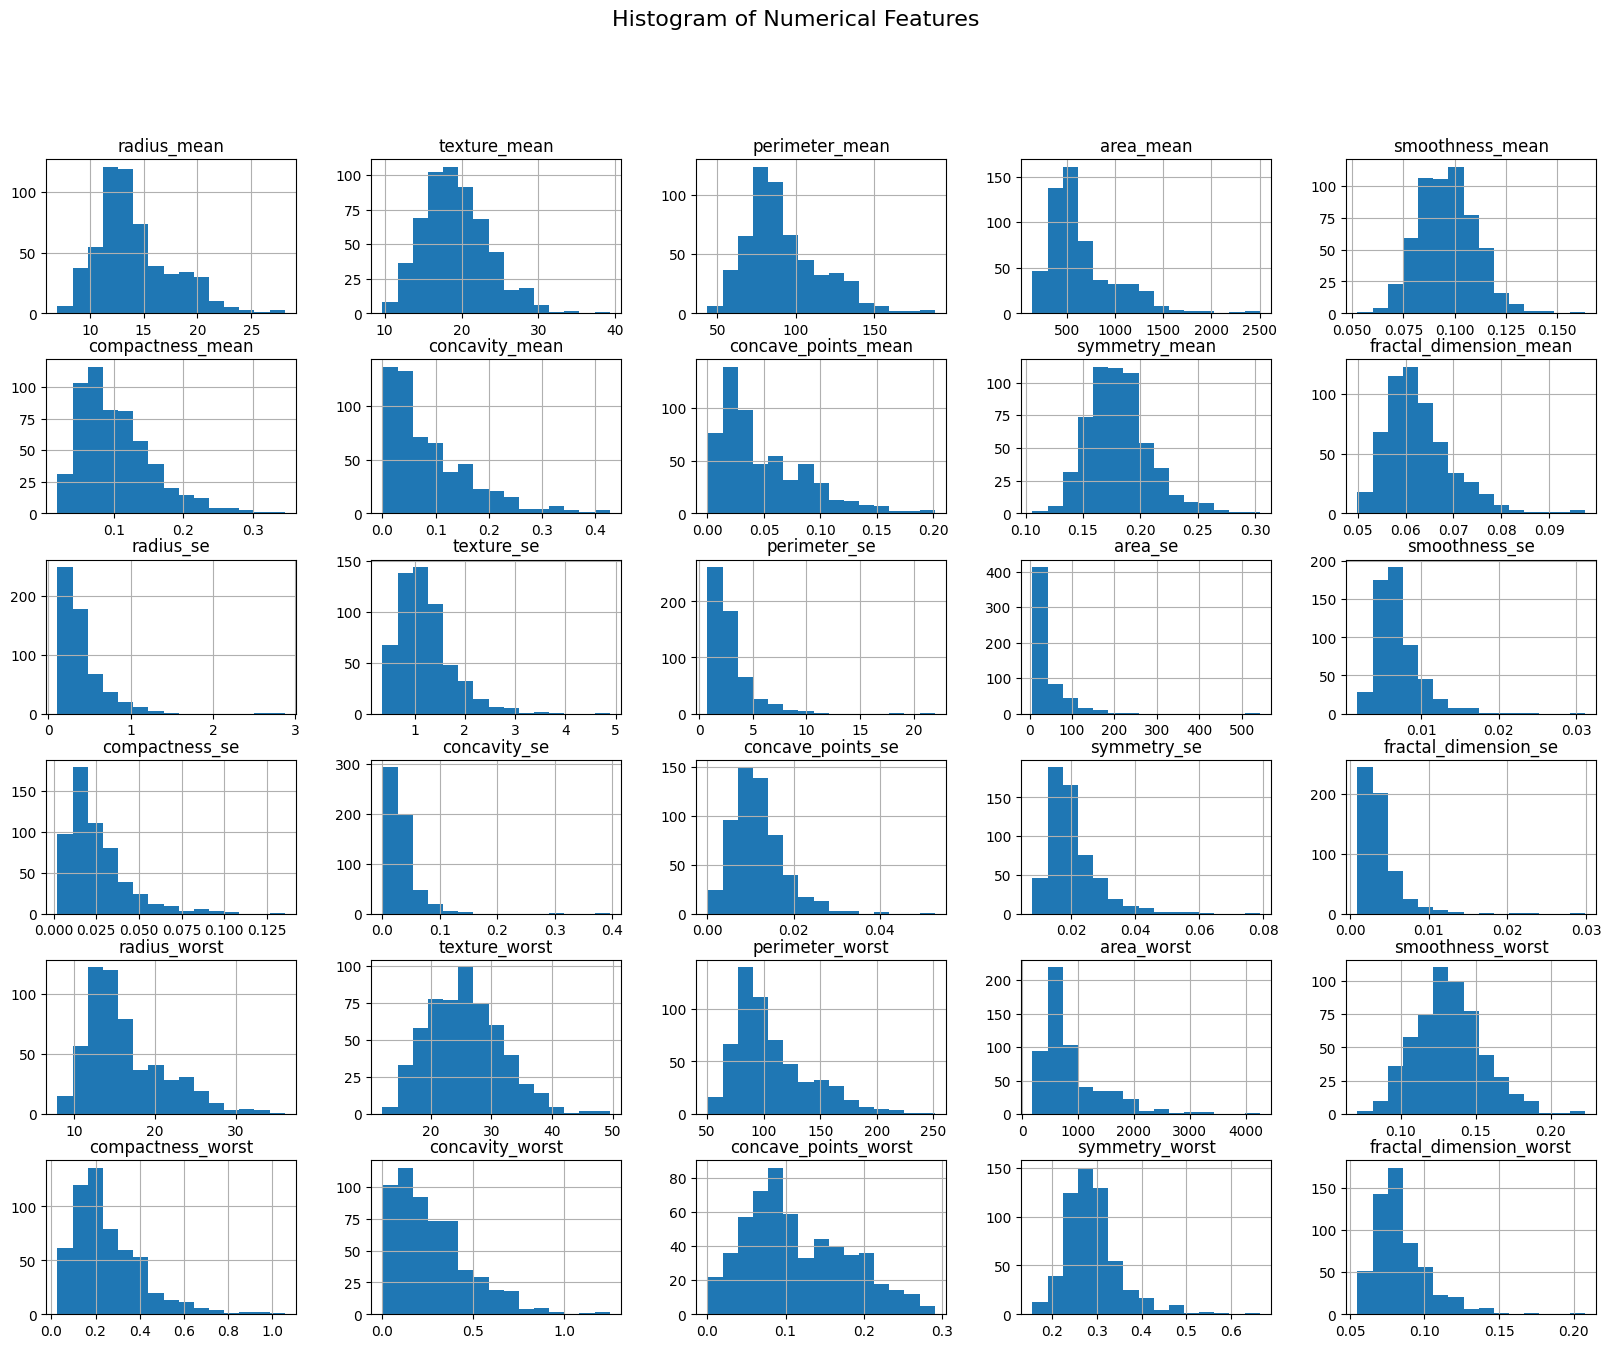

In [9]:
# Histogram
df.drop(columns=['diagnosis']).hist(figsize=(20, 15), bins=15)
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.show()

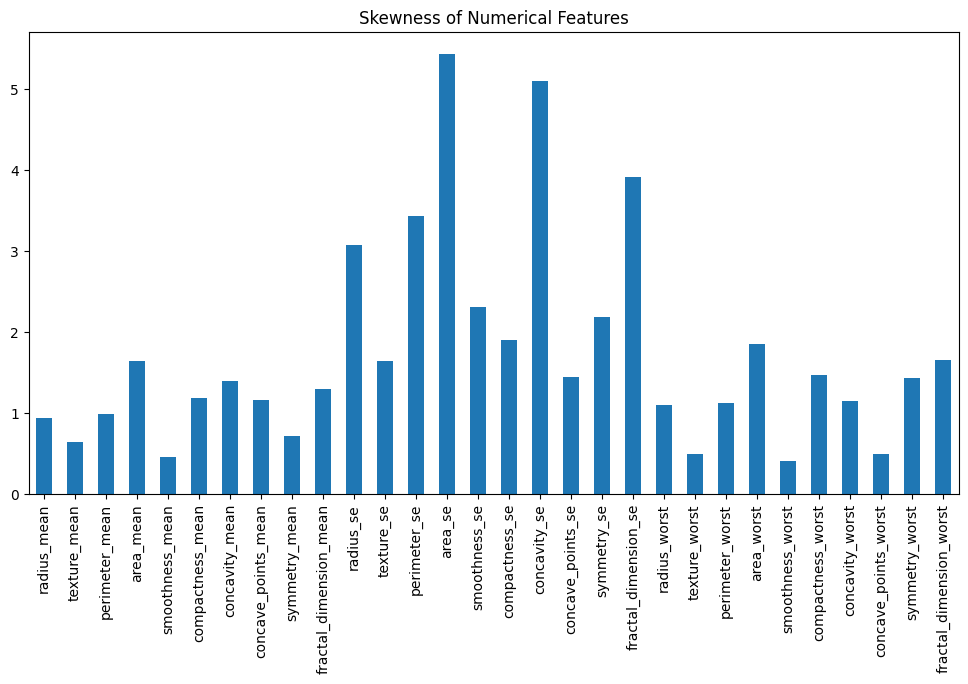

In [10]:
# Skewness Calculation
skewness = df.drop(columns=['diagnosis']).apply(lambda x: skew(x))
skewness.plot(kind='bar', figsize=(12, 6), title='Skewness of Numerical Features')
plt.xticks(rotation=90)
plt.show()

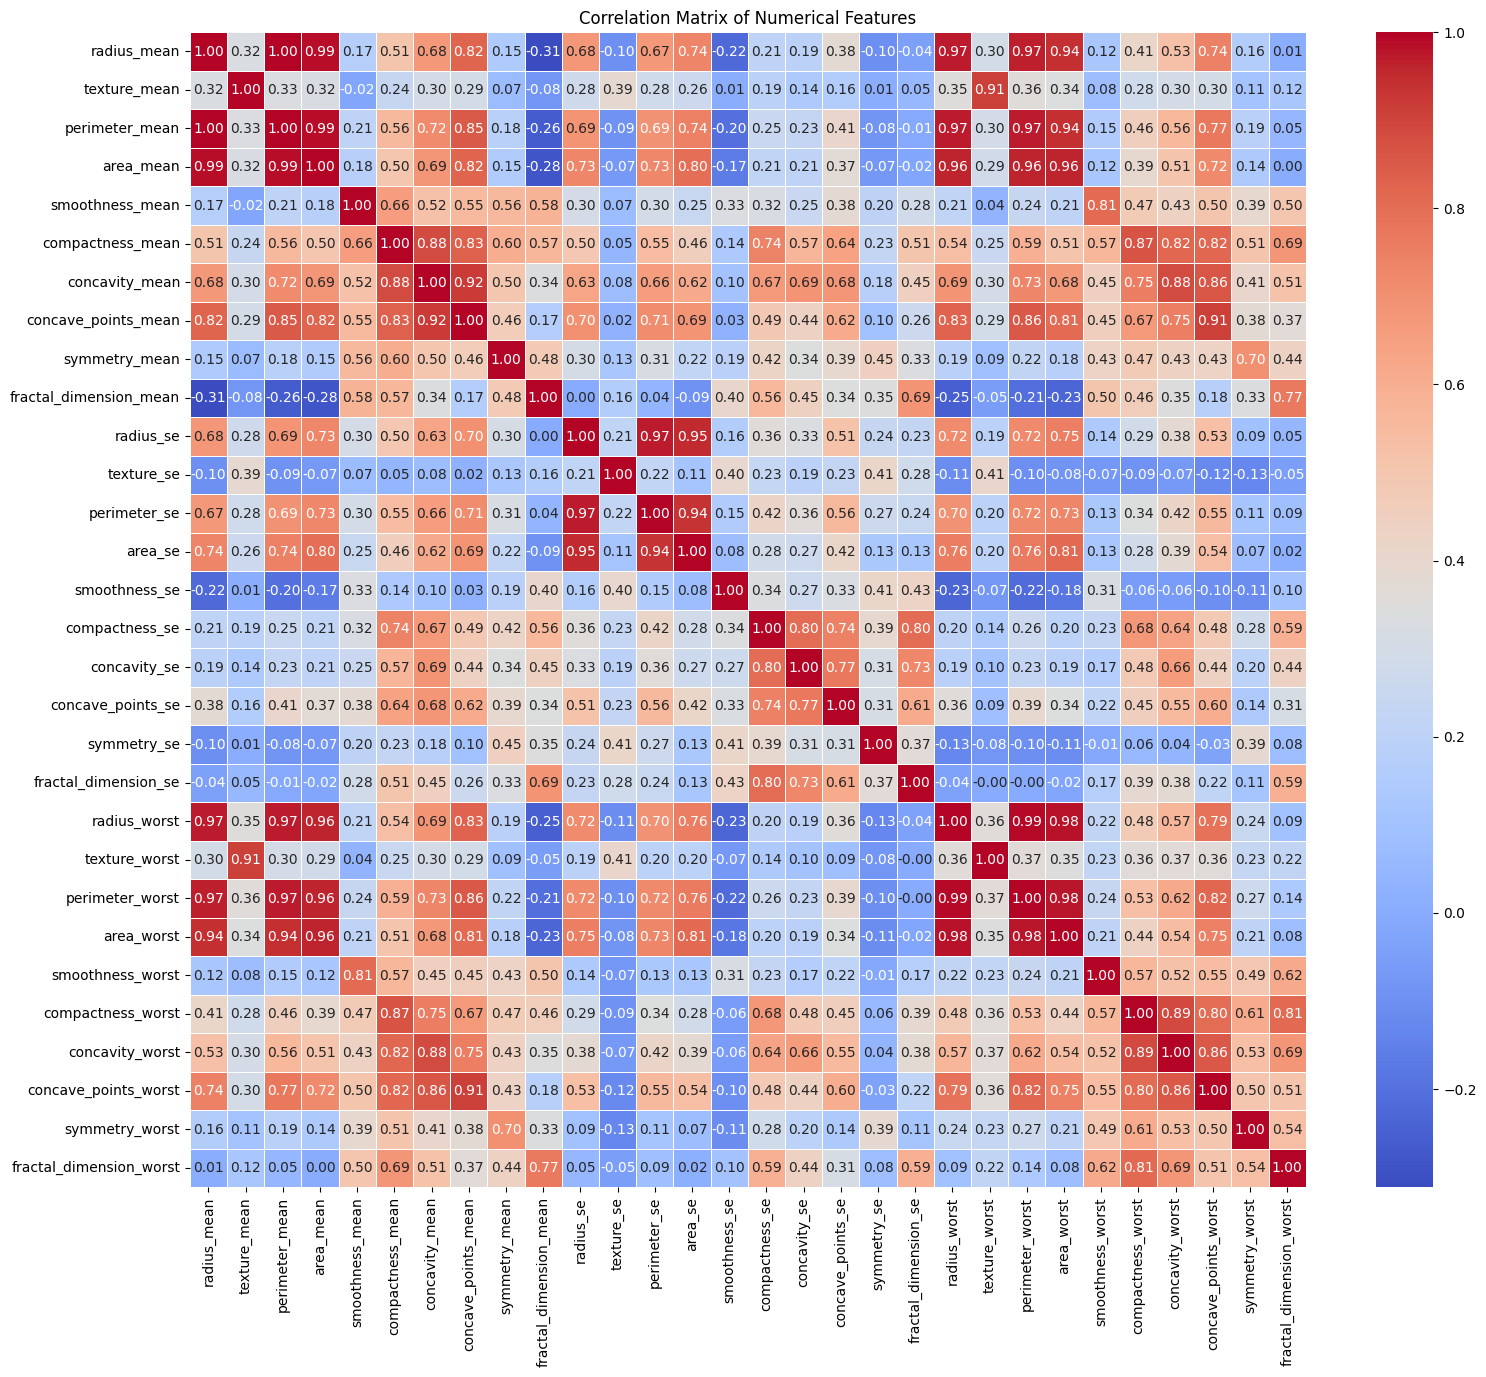

In [11]:
# Correlation Matrix
plt.figure(figsize=(18, 15))
corr_matrix = df.drop(columns=['diagnosis']).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
# Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [13]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Correct Skewness using Power Transformer
pt = PowerTransformer()
X_corrected = pt.fit_transform(X_scaled)


In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_corrected, y, test_size=0.2, random_state=42)


In [16]:
# Model Training
# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [17]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Random Forest (RF)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Model Evaluation
models = {'SVM': svm_model, 'KNN': knn_model, 'Random Forest': rf_model}


Evaluation for SVM:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Evaluation for KNN:
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Evaluation for Random Forest:
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
 

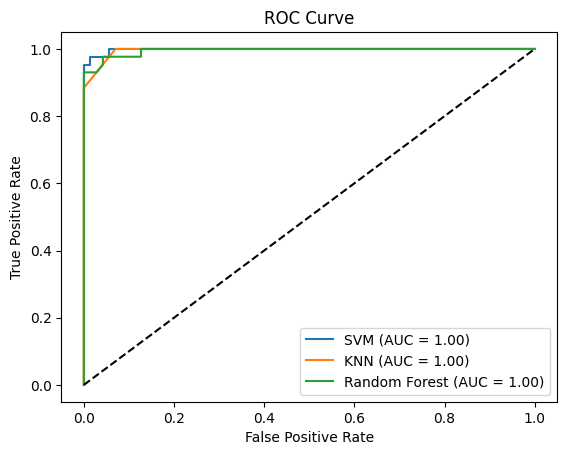

In [20]:
for name, model in models.items():
    print(f"Evaluation for {name}:")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test.map({'M': 1, 'B': 0}), y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Confusion Matrix for SVM:


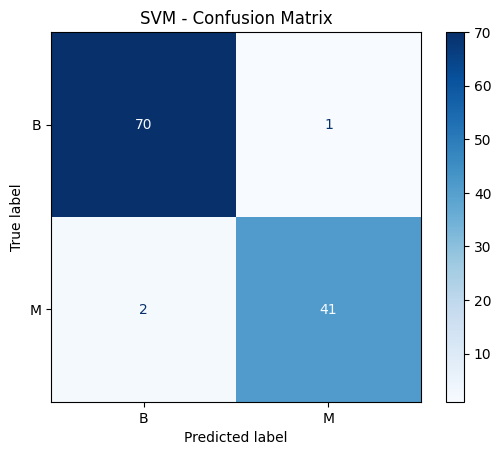

Confusion Matrix for KNN:


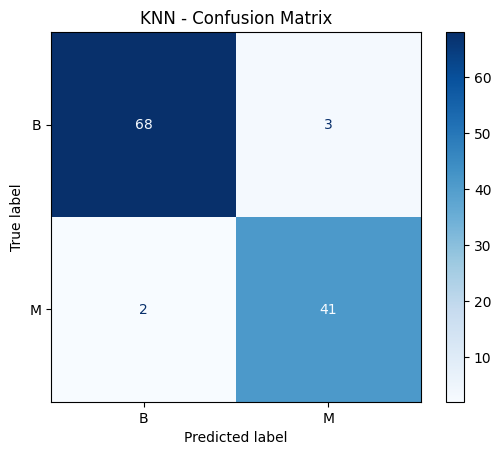

Confusion Matrix for Random Forest:


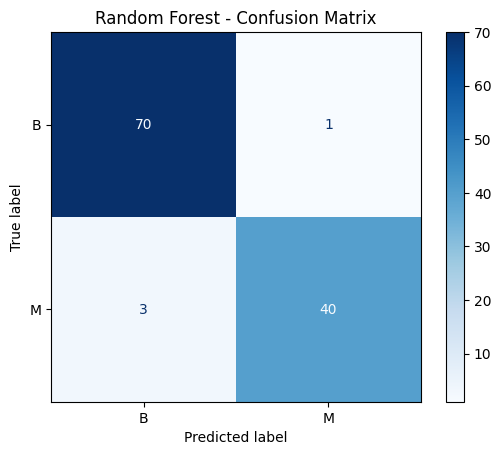

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {name}:")

    # Display the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels=['B', 'M'])
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


# **adding impurities 20%**

In [22]:
import random

# Step 1: Randomly change 20% of the data values to zero
def randomly_zero_out(df, percentage=0.2):
    df_copy = df.copy()
    num_values = int(len(df_copy) * len(df_copy.columns) * percentage)

    # Randomly select the indices
    for _ in range(num_values):
        row = random.randint(0, len(df_copy) - 1)
        col = random.randint(0, len(df_copy.columns) - 1)
        if df_copy.columns[col] != 'diagnosis':  # Do not zero out the target column
            df_copy.iat[row, col] = 0
    return df_copy


In [23]:
df_edited = randomly_zero_out(df)

In [24]:
# Step 2: Remove highly correlated features
def remove_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.drop(columns=['diagnosis']).corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find columns to drop
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return df.drop(columns=to_drop)

df_edited = remove_highly_correlated_features(df_edited)


In [25]:
# Step 3: Preprocessing - Correct Skewness, Standardize, and Split
X_edited = df_edited.drop(columns=['diagnosis'])
y_edited = df_edited['diagnosis']


In [26]:
# Standardization
scaler = StandardScaler()
X_scaled_edited = scaler.fit_transform(X_edited)

In [27]:
# Correct Skewness using Power Transformer
pt = PowerTransformer()
X_corrected_edited = pt.fit_transform(X_scaled_edited)


In [28]:
# Split data into training and testing sets
X_train_edited, X_test_edited, y_train_edited, y_test_edited = train_test_split(X_corrected_edited, y_edited, test_size=0.2, random_state=42)


In [29]:
# Train SVM, KNN, and Random Forest again
svm_model_edited = SVC(probability=True)
svm_model_edited.fit(X_train_edited, y_train_edited)

knn_model_edited = KNeighborsClassifier()
knn_model_edited.fit(X_train_edited, y_train_edited)

rf_model_edited = RandomForestClassifier(random_state=42)
rf_model_edited.fit(X_train_edited, y_train_edited)


RandomForestClassifier(random_state=42)

Confusion Matrix for SVM (Edited Data):


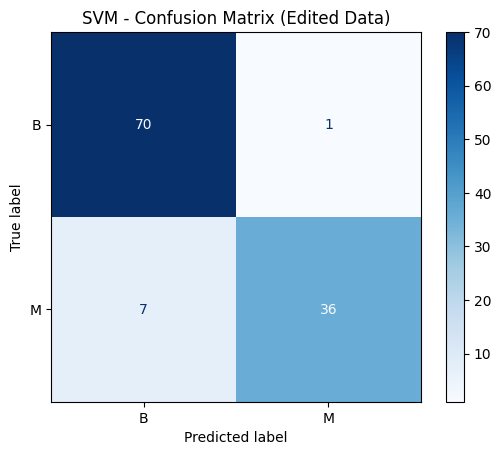

Confusion Matrix for KNN (Edited Data):


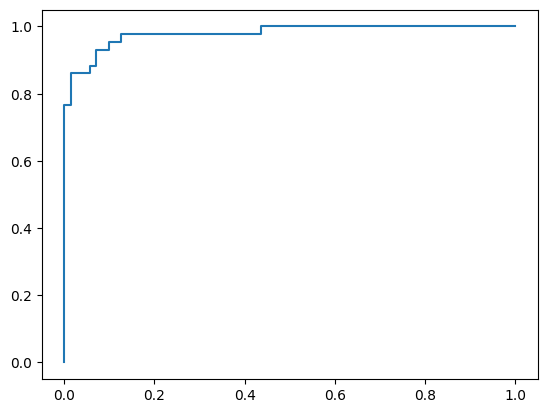

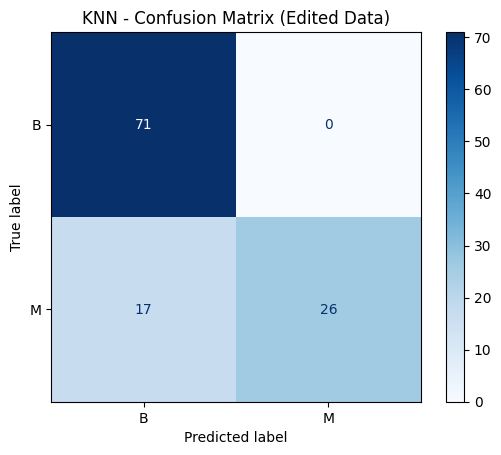

Confusion Matrix for Random Forest (Edited Data):


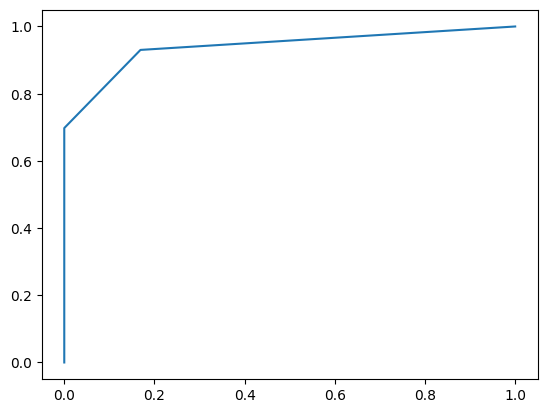

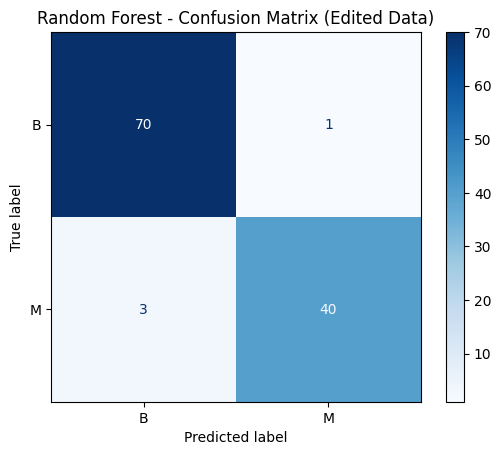

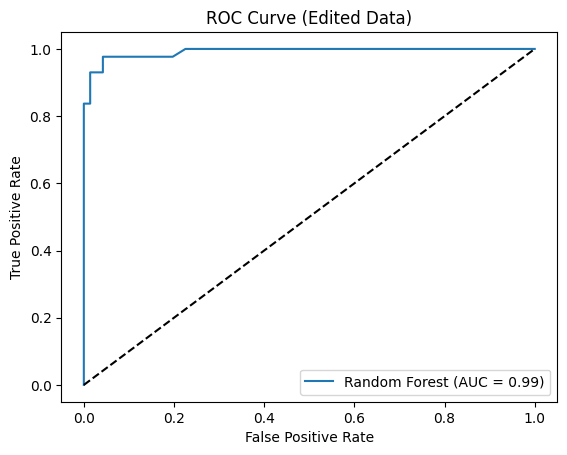

In [30]:
# Model Evaluation with Confusion Matrices
models_edited = {'SVM': svm_model_edited, 'KNN': knn_model_edited, 'Random Forest': rf_model_edited}

for name, model in models_edited.items():
    y_pred_edited = model.predict(X_test_edited)
    print(f"Confusion Matrix for {name} (Edited Data):")

    # Display the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test_edited, y_pred_edited, cmap='Blues', display_labels=['B', 'M'])
    plt.title(f'{name} - Confusion Matrix (Edited Data)')
    plt.show()

    # ROC Curve
    y_prob_edited = model.predict_proba(X_test_edited)[:, 1]
    fpr_edited, tpr_edited, _ = roc_curve(y_test_edited.map({'M': 1, 'B': 0}), y_prob_edited)
    plt.plot(fpr_edited, tpr_edited, label=f'{name} (AUC = {auc(fpr_edited, tpr_edited):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Edited Data)')
plt.legend()
plt.show()